In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [48]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


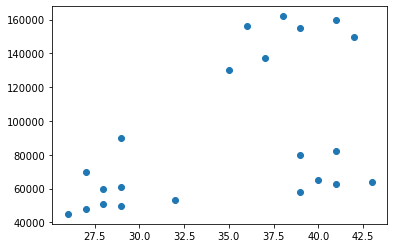

In [49]:
plt.scatter(df['Age'], df['Income($)'])

In [50]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [51]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [52]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


No handles with labels found to put in legend.


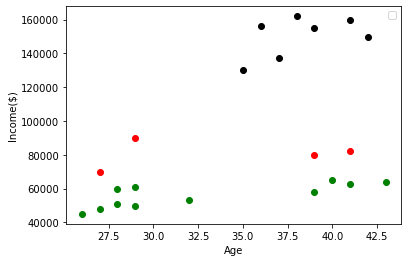

In [53]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='black')
plt.scatter(df3['Age'], df3['Income($)'], color='red')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [54]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [55]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [56]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted
df['cluster'] = y_predicted

No handles with labels found to put in legend.


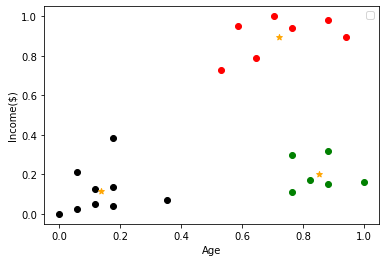

In [57]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='black')
plt.scatter(df3['Age'], df3['Income($)'], color='red')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='orange', marker='*')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [58]:
k_rng = range(1,10)
sse = []
OMP_NUM_THREADS=1
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

sse

c:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21066678488010523,
 0.17355596555312644,
 0.13265419827245162,
 0.10188787724979426]

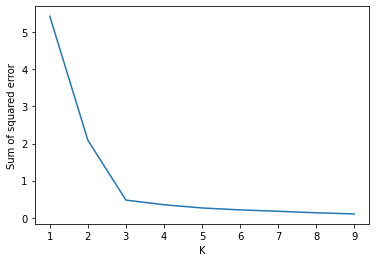

In [59]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)